In [ ]:
# Predicting Mental Health Treatment Intensity (Machine Learning CA2)

In [71]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# DATA LOADING

In [3]:
## importing dataset
ML_CA2_Project = pd.read_csv('C:/Users/maxwe/Desktop/MACHINE LEARNING SEP24/CA2/Datasets/Patient_Characteristics_Survey__PCS___2019_20250806.csv')

In [6]:
ML_CA2_Project.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2019,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,117
1,2019,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,100
2,2019,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,120
3,2019,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,UNKNOWN,OTHER,OTHER LIVING SITUATION,...,NO,False,YES,NO,NO,NO,NO,NO,NO,114
4,2019,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,142


In [9]:
## printing column headers
ML_CA2_Project.columns.tolist()

['Survey Year',
 'Program Category',
 'Region Served',
 'Age Group',
 'Sex',
 'Transgender',
 'Sexual Orientation',
 'Hispanic Ethnicity',
 'Race',
 'Living Situation',
 'Household Composition',
 'Preferred Language',
 'Religious Preference',
 'Veteran Status',
 'Employment Status',
 'Number Of Hours Worked Each Week',
 'Education Status',
 'Special Education Services',
 'Mental Illness',
 'Intellectual Disability',
 'Autism Spectrum',
 'Other Developmental Disability',
 'Alcohol Related Disorder',
 'Drug Substance Disorder',
 'Opioid Related Disorder',
 'Mobility Impairment Disorder',
 'Hearing Impairment',
 'Visual Impairment',
 'Speech Impairment',
 'Hyperlipidemia',
 'High Blood Pressure',
 'Diabetes',
 'Obesity',
 'Heart Attack',
 'Stroke',
 'Other Cardiac',
 'Pulmonary Asthma',
 'Alzheimer or Dementia',
 'Kidney Disease',
 'Liver Disease',
 'Endocrine Condition',
 'Neurological Condition',
 'Traumatic Brain Injury',
 'Joint Disease',
 'Cancer',
 'Other Chronic Med Condition',
 'N

In [11]:
# DATA REDUCTION

In [13]:
## filtering with the relevant columns for my analysis

relevant_columns = [
    'Age Group',
    'Sex',
    'Race',
    'Education Status',
    'Employment Status',
    'Living Situation',
    'Region Served',
    'No Insurance',
    'Mental Illness',
    'Serious Mental Illness',
    'Alcohol Related Disorder',
    'Drug Substance Disorder',
    'Opioid Related Disorder',
    'Program Category'
]
ML_CA2_Project = ML_CA2_Project[relevant_columns]

In [15]:
ML_CA2_Project.columns.tolist()

['Age Group',
 'Sex',
 'Race',
 'Education Status',
 'Employment Status',
 'Living Situation',
 'Region Served',
 'No Insurance',
 'Mental Illness',
 'Serious Mental Illness',
 'Alcohol Related Disorder',
 'Drug Substance Disorder',
 'Opioid Related Disorder',
 'Program Category']

In [17]:
# DATA CLEANING

In [19]:
## Handling Missing Values

In [21]:
# Count 'UNKNOWN' values for each column
unknown_counts = (ML_CA2_Project == 'UNKNOWN').sum()
print(unknown_counts)

Age Group                      80
Sex                           395
Race                            0
Education Status            20799
Employment Status               0
Living Situation             8893
Region Served                   0
No Insurance                 4938
Mental Illness               1985
Serious Mental Illness       1221
Alcohol Related Disorder    11685
Drug Substance Disorder     11526
Opioid Related Disorder     15131
Program Category                0
dtype: int64


In [23]:
# printing the percentage of 'UNKNOWN' values for each column
unknown_percentage = (ML_CA2_Project == 'UNKNOWN').sum() / len(ML_CA2_Project) * 100

for column, percentage in unknown_percentage.items():
   print(f"{column}: {percentage:.2f}%")

Age Group: 0.04%
Sex: 0.20%
Race: 0.00%
Education Status: 10.61%
Employment Status: 0.00%
Living Situation: 4.53%
Region Served: 0.00%
No Insurance: 2.52%
Mental Illness: 1.01%
Serious Mental Illness: 0.62%
Alcohol Related Disorder: 5.96%
Drug Substance Disorder: 5.88%
Opioid Related Disorder: 7.72%
Program Category: 0.00%


In [25]:
## I observe that even though "unknown" values are present in multiple variables, the number of existent data is more than enough for my analysis.
## Therefore, aggressive dropping of "unknown" values is acceptable in this case due to the plethora of data!

In [27]:
## printing the values for all columns to ensure no other forms of NaN values are present
for col in ML_CA2_Project.columns:
    print(f"\n{col}:")
    print(ML_CA2_Project[col].value_counts())


Age Group:
Age Group
ADULT      152202
CHILD       43820
UNKNOWN        80
Name: count, dtype: int64

Sex:
Sex
FEMALE     99244
MALE       96463
UNKNOWN      395
Name: count, dtype: int64

Race:
Race
WHITE ONLY      96075
BLACK ONLY      51022
OTHER           36117
UNKNOWN RACE     7403
MULTI-RACIAL     5485
Name: count, dtype: int64

Education Status:
Education Status
MIDDLE SCHOOL TO HIGH SCHOOL    100276
COLLEGE OR GRADUATE DEGREE       27769
SOME COLLEGE                     25349
UNKNOWN                          20799
PRE-K TO FIFTH GRADE             17679
OTHER                             3798
NO FORMAL EDUCATION                432
Name: count, dtype: int64

Employment Status:
Employment Status
NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK    125629
EMPLOYED                                                   34674
UNEMPLOYED, LOOKING FOR WORK                               21445
UNKNOWN EMPLOYMENT STATUS                                  12518
NON-PAID/VOLUNTEER            

In [31]:
# Replacing 'UNKNOWN' values with NaN in the entire dataset
ML_CA2_Project = ML_CA2_Project.replace(['UNKNOWN','UNKNOWN RACE','UNKNOWN EMPLOYMENT STATUS'], np.nan)

# Dropping rows with any NaN values
ML_CA2_Project = ML_CA2_Project.dropna()

In [33]:
## printing the values for all columns (after NaN drop)
for col in ML_CA2_Project.columns:
    print(f"\n{col}:")
    print(ML_CA2_Project[col].value_counts())


Age Group:
Age Group
ADULT    118940
CHILD     34066
Name: count, dtype: int64

Sex:
Sex
FEMALE    77172
MALE      75834
Name: count, dtype: int64

Race:
Race
WHITE ONLY      80620
BLACK ONLY      40408
OTHER           27248
MULTI-RACIAL     4730
Name: count, dtype: int64

Education Status:
Education Status
MIDDLE SCHOOL TO HIGH SCHOOL    87603
COLLEGE OR GRADUATE DEGREE      24917
SOME COLLEGE                    22734
PRE-K TO FIFTH GRADE            14091
OTHER                            3271
NO FORMAL EDUCATION               390
Name: count, dtype: int64

Employment Status:
Employment Status
NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK    104055
EMPLOYED                                                   29629
UNEMPLOYED, LOOKING FOR WORK                               17702
NON-PAID/VOLUNTEER                                          1620
Name: count, dtype: int64

Living Situation:
Living Situation
PRIVATE RESIDENCE         125353
OTHER LIVING SITUATION     26487
INSTITUTIO

In [35]:
## DATA GROUPING & STANDARDISATION

In [37]:
# merging MULTI-RACIAL and OTHER into one category "OTHER/MULTI-RACIAL" in Rcae column
ML_CA2_Project['Race'] = ML_CA2_Project['Race'].replace(['MULTI-RACIAL', 'OTHER'], 'OTHER/MULTI-RACIAL')

In [39]:
# merging NO FORMAL EDUCATION and OTHER into one category "OTHER EDUCATION" in Education Status column
ML_CA2_Project['Education Status'] = ML_CA2_Project['Education Status'].replace(['NO FORMAL EDUCATION', 'OTHER'], 'OTHER')

In [41]:
# merging my target variable's categories 'Program Category' based on the intensity of the treatment required
#values NO FORMAL EDUCATION and OTHER into one category "OTHER EDUCATION" in Education Status column
ML_CA2_Project['Program Category'] = ML_CA2_Project['Program Category'].replace({
    'OUTPATIENT': 'NON-INTENSIVE',
    'SUPPORT': 'NON-INTENSIVE',
    'RESIDENTIAL': 'INTENSIVE', 
    'INPATIENT': 'INTENSIVE',
    'EMERGENCY': 'INTENSIVE'
})

In [43]:
# creating mapping dictionaries for variables with long value names
education_mapping = {
   'MIDDLE SCHOOL TO HIGH SCHOOL': 'HIGH SCHOOL',
   'COLLEGE OR GRADUATE DEGREE': 'COLLEGE+',
   'SOME COLLEGE': 'SOME COLLEGE',
   'PRE-K TO FIFTH GRADE': 'ELEMENTARY',
   'OTHER': 'OTHER',
}

employment_mapping = {
   'NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK': 'NOT IN LABOR FORCE',
   'EMPLOYED': 'EMPLOYED',
   'UNEMPLOYED, LOOKING FOR WORK': 'UNEMPLOYED',
   'NON-PAID/VOLUNTEER': 'VOLUNTEER'
}

living_mapping = {
   'PRIVATE RESIDENCE': 'PRIVATE HOME',
   'OTHER LIVING SITUATION': 'OTHER',
   'INSTITUTIONAL SETTING': 'INSTITUTIONAL'
}

region_mapping = {
    'NEW YORK CITY REGION': 'NY CITY',
    'LONG ISLAND REGION': 'LONG ISLAND',
    'WESTERN REGION': 'WESTERN NY',
    'HUDSON RIVER REGION': 'HUDSON RIVER',
    'CENTRAL NY REGION': 'CENTRAL NY'
}

# Apply mappings to your dataframe
ML_CA2_Project['Education Status'] = ML_CA2_Project['Education Status'].map(education_mapping)
ML_CA2_Project['Employment Status'] = ML_CA2_Project['Employment Status'].map(employment_mapping)
ML_CA2_Project['Living Situation'] = ML_CA2_Project['Living Situation'].map(living_mapping)
ML_CA2_Project['Region Served'] = ML_CA2_Project['Region Served'].map(region_mapping)

In [45]:
## DATA SAMPLING

In [47]:
# performing randmom sampling of 30k samples in each category for equal representation and balanced classification!

In [49]:
# importing necessary library
from sklearn.utils import resample

# separating the patients between ones requiring intensive treatment and non-intensive treatment.
intensive = ML_CA2_Project[ML_CA2_Project['Program Category'] == 'INTENSIVE']
non_intensive = ML_CA2_Project[ML_CA2_Project['Program Category'] == 'NON-INTENSIVE']

In [51]:
# sampling 30k random cases from each category
intensive_sample = resample(intensive, n_samples=30000, random_state=42)
non_intensive_sample = resample(non_intensive, n_samples=30000, random_state=42)

In [53]:
# joining both sample datasets to form the final balanced one
ML_CA2_Balanced = pd.concat([intensive_sample, non_intensive_sample])

In [55]:
## printing the values for all columns (after sampling)
for col in ML_CA2_Balanced.columns:
    print(f"\n{col}:")
    print(ML_CA2_Balanced[col].value_counts())


Age Group:
Age Group
ADULT    50358
CHILD     9642
Name: count, dtype: int64

Sex:
Sex
MALE      31751
FEMALE    28249
Name: count, dtype: int64

Race:
Race
WHITE ONLY            30658
BLACK ONLY            18347
OTHER/MULTI-RACIAL    10995
Name: count, dtype: int64

Education Status:
Education Status
HIGH SCHOOL     36396
COLLEGE+         9238
SOME COLLEGE     8870
ELEMENTARY       3919
OTHER            1577
Name: count, dtype: int64

Employment Status:
Employment Status
NOT IN LABOR FORCE    42473
EMPLOYED               9802
UNEMPLOYED             7093
VOLUNTEER               632
Name: count, dtype: int64

Living Situation:
Living Situation
PRIVATE HOME     45132
OTHER            13963
INSTITUTIONAL      905
Name: count, dtype: int64

Region Served:
Region Served
NY CITY         29637
WESTERN NY       9858
HUDSON RIVER     8655
CENTRAL NY       6377
LONG ISLAND      5473
Name: count, dtype: int64

No Insurance:
No Insurance
NO     56386
YES     3614
Name: count, dtype: int64

Mental

In [57]:
# renaming columns for clarity
CA2_treatment_intensity = ML_CA2_Balanced.rename(columns={
    'Age Group': 'age_group',
    'Sex': 'gender',
    'Race': 'race',
    'Education Status': 'education_level',
    'Employment Status': 'employment_status',
    'Living Situation': 'housing_situation',
    'Region Served': 'region',
    'No Insurance': 'no_insurance',
    'Mental Illness': 'mental_illness',
    'Serious Mental Illness': 'serious_mental_illness',
    'Alcohol Related Disorder': 'alcohol_disorder',
    'Drug Substance Disorder': 'substance_disorder',
    'Opioid Related Disorder': 'opioid_disorder',  
    'Program Category': 'treatment_intensity'
})

In [59]:
# exporting the clean categorical dataset to a CSV file
#CA2_treatment_intensity.to_csv('C:/Users/maxwe/Desktop/MACHINE LEARNING SEP24/CA2/Datasets/CA2_treatment_intensity.csv', index=False)

In [61]:
## EXPLORATORY DATA ANALYSIS (EDA) 

In [63]:
# Demographic Patterns

In [65]:
# distribution of treatment intensity by age group
print(CA2_treatment_intensity.groupby(['age_group', 'treatment_intensity']).size())
# prevalence of treatment intensity by age group (percentages)
print(pd.crosstab(CA2_treatment_intensity['age_group'], CA2_treatment_intensity['treatment_intensity'], normalize='index') * 100)

age_group  treatment_intensity
ADULT      INTENSIVE              28471
           NON-INTENSIVE          21887
CHILD      INTENSIVE               1529
           NON-INTENSIVE           8113
dtype: int64
treatment_intensity  INTENSIVE  NON-INTENSIVE
age_group                                    
ADULT                56.537194      43.462806
CHILD                15.857706      84.142294


(array([0, 1]), [Text(0, 0, 'ADULT'), Text(1, 0, 'CHILD')])

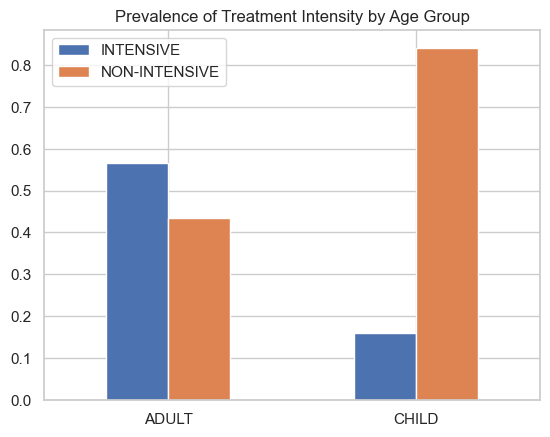

In [75]:
# age group vs treatment intensity
sns.set(style="whitegrid")
pd.crosstab(CA2_treatment_intensity['age_group'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Age Group')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

In [77]:
# distribution of treatment intensity by gender
print(CA2_treatment_intensity.groupby(['gender', 'treatment_intensity']).size())
# prevalence of treatment intensity by gender (percentages)
print(pd.crosstab(CA2_treatment_intensity['gender'], CA2_treatment_intensity['treatment_intensity'], normalize='index') * 100)

gender  treatment_intensity
FEMALE  INTENSIVE              12167
        NON-INTENSIVE          16082
MALE    INTENSIVE              17833
        NON-INTENSIVE          13918
dtype: int64
treatment_intensity  INTENSIVE  NON-INTENSIVE
gender                                       
FEMALE               43.070551      56.929449
MALE                 56.165160      43.834840


(array([0, 1]), [Text(0, 0, 'FEMALE'), Text(1, 0, 'MALE')])

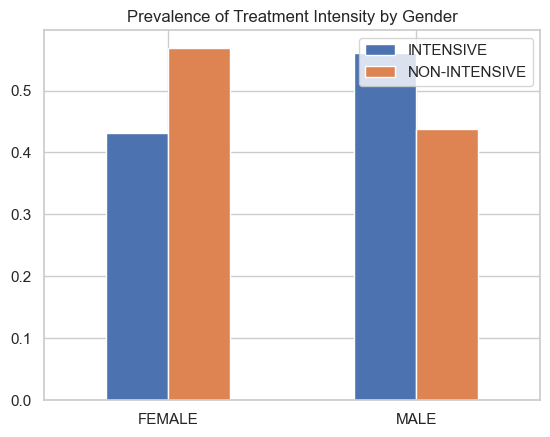

In [79]:
# gender vs treatment intensity
pd.crosstab(CA2_treatment_intensity['gender'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Gender')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

In [81]:
# distribution of treatment intensity by race
print(CA2_treatment_intensity.groupby(['race', 'treatment_intensity']).size())
# prevalence of treatment intensity by race (percentages)
print(pd.crosstab(CA2_treatment_intensity['race'], CA2_treatment_intensity['treatment_intensity'], normalize='index') * 100)

race                treatment_intensity
BLACK ONLY          INTENSIVE              11653
                    NON-INTENSIVE           6694
OTHER/MULTI-RACIAL  INTENSIVE               4053
                    NON-INTENSIVE           6942
WHITE ONLY          INTENSIVE              14294
                    NON-INTENSIVE          16364
dtype: int64
treatment_intensity  INTENSIVE  NON-INTENSIVE
race                                         
BLACK ONLY           63.514471      36.485529
OTHER/MULTI-RACIAL   36.862210      63.137790
WHITE ONLY           46.624046      53.375954


(array([0, 1, 2]),
 [Text(0, 0, 'BLACK ONLY'),
  Text(1, 0, 'OTHER/MULTI-RACIAL'),
  Text(2, 0, 'WHITE ONLY')])

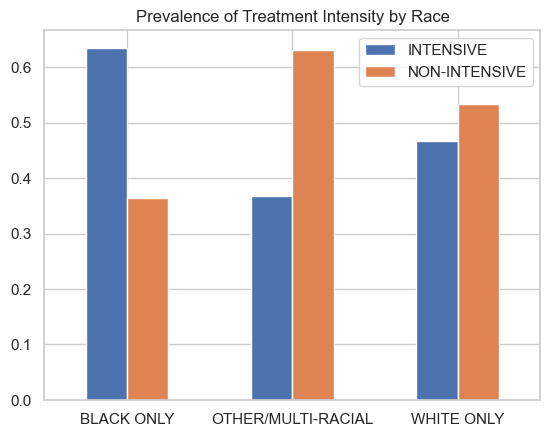

In [83]:
# race vs treatment intensity
pd.crosstab(CA2_treatment_intensity['race'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Race')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

In [85]:
# Socio-economic Patterns

In [87]:
# distribution of treatment intensity by education level
print(CA2_treatment_intensity.groupby(['education_level', 'treatment_intensity']).size())
# prevalence of treatment intensity by education level (percentages)
print(pd.crosstab(CA2_treatment_intensity['education_level'], CA2_treatment_intensity['treatment_intensity'], normalize='index') * 100)

education_level  treatment_intensity
COLLEGE+         INTENSIVE               3906
                 NON-INTENSIVE           5332
ELEMENTARY       INTENSIVE                587
                 NON-INTENSIVE           3332
HIGH SCHOOL      INTENSIVE              20096
                 NON-INTENSIVE          16300
OTHER            INTENSIVE                852
                 NON-INTENSIVE            725
SOME COLLEGE     INTENSIVE               4559
                 NON-INTENSIVE           4311
dtype: int64
treatment_intensity  INTENSIVE  NON-INTENSIVE
education_level                              
COLLEGE+             42.281879      57.718121
ELEMENTARY           14.978311      85.021689
HIGH SCHOOL          55.214859      44.785141
OTHER                54.026633      45.973367
SOME COLLEGE         51.397971      48.602029


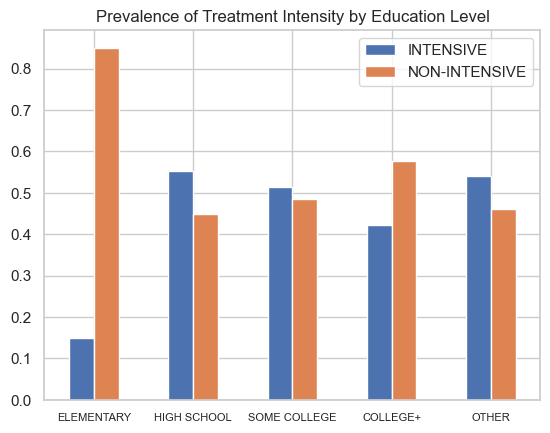

In [91]:
# sorting education level from lowest to highest
education_order = ['ELEMENTARY', 'HIGH SCHOOL', 'SOME COLLEGE', 'COLLEGE+', 'OTHER']

# education level vs treatment intensity
crosstab_data = pd.crosstab(CA2_treatment_intensity['education_level'], CA2_treatment_intensity['treatment_intensity'], normalize='index')
# re-indexing to use the sorted order
crosstab_data = crosstab_data.reindex(education_order)

# plotting with sorted education level
crosstab_data.plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Education Level')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0, fontsize=8)
plt.show()

In [93]:
# distribution of treatment intensity by employment level
print(CA2_treatment_intensity.groupby(['employment_status', 'treatment_intensity']).size())
# prevalence of treatment intensity by employment level (percentages)
print(pd.crosstab(CA2_treatment_intensity['employment_status'], CA2_treatment_intensity['treatment_intensity'], normalize='index') * 100)

employment_status   treatment_intensity
EMPLOYED            INTENSIVE               3313
                    NON-INTENSIVE           6489
NOT IN LABOR FORCE  INTENSIVE              22813
                    NON-INTENSIVE          19660
UNEMPLOYED          INTENSIVE               3541
                    NON-INTENSIVE           3552
VOLUNTEER           INTENSIVE                333
                    NON-INTENSIVE            299
dtype: int64
treatment_intensity  INTENSIVE  NON-INTENSIVE
employment_status                            
EMPLOYED             33.799225      66.200775
NOT IN LABOR FORCE   53.711770      46.288230
UNEMPLOYED           49.922459      50.077541
VOLUNTEER            52.689873      47.310127


(array([0, 1, 2, 3]),
 [Text(0, 0, 'EMPLOYED'),
  Text(1, 0, 'NOT IN LABOR FORCE'),
  Text(2, 0, 'UNEMPLOYED'),
  Text(3, 0, 'VOLUNTEER')])

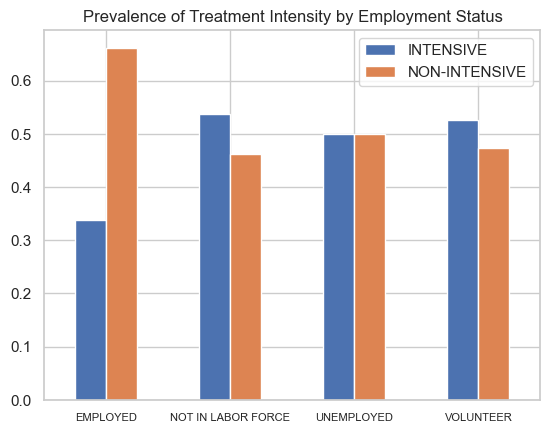

In [95]:
# employment status vs treatment intensity
pd.crosstab(CA2_treatment_intensity['employment_status'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Employment Status')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0, fontsize=8) 

In [97]:
# distribution of treatment intensity by housing situation
print(CA2_treatment_intensity.groupby(['housing_situation', 'treatment_intensity']).size())
# prevalence of treatment intensity by housing situation (percentages)
print(pd.crosstab(CA2_treatment_intensity['housing_situation'], CA2_treatment_intensity['treatment_intensity'], normalize='index') * 100)

housing_situation  treatment_intensity
INSTITUTIONAL      INTENSIVE                842
                   NON-INTENSIVE             63
OTHER              INTENSIVE              10252
                   NON-INTENSIVE           3711
PRIVATE HOME       INTENSIVE              18906
                   NON-INTENSIVE          26226
dtype: int64
treatment_intensity  INTENSIVE  NON-INTENSIVE
housing_situation                            
INSTITUTIONAL        93.038674       6.961326
OTHER                73.422617      26.577383
PRIVATE HOME         41.890455      58.109545


(array([0, 1, 2]),
 [Text(0, 0, 'INSTITUTIONAL'),
  Text(1, 0, 'OTHER'),
  Text(2, 0, 'PRIVATE HOME')])

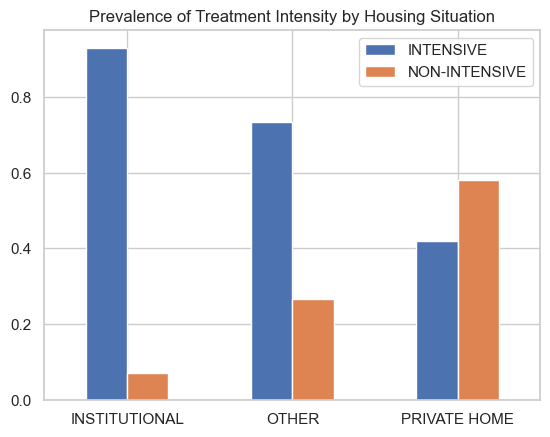

In [99]:
# housing situation vs treatment intensity
pd.crosstab(CA2_treatment_intensity['housing_situation'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Housing Situation')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0) 

In [101]:
# distribution of treatment intensity by region
print(CA2_treatment_intensity.groupby(['region', 'treatment_intensity']).size())
# prevalence of treatment intensity by region (percentages)
print(pd.crosstab(CA2_treatment_intensity['region'], CA2_treatment_intensity['treatment_intensity'], normalize='index') * 100)

region        treatment_intensity
CENTRAL NY    INTENSIVE               2420
              NON-INTENSIVE           3957
HUDSON RIVER  INTENSIVE               4505
              NON-INTENSIVE           4150
LONG ISLAND   INTENSIVE               3034
              NON-INTENSIVE           2439
NY CITY       INTENSIVE              16172
              NON-INTENSIVE          13465
WESTERN NY    INTENSIVE               3869
              NON-INTENSIVE           5989
dtype: int64
treatment_intensity  INTENSIVE  NON-INTENSIVE
region                                       
CENTRAL NY           37.948879      62.051121
HUDSON RIVER         52.050838      47.949162
LONG ISLAND          55.435776      44.564224
NY CITY              54.566926      45.433074
WESTERN NY           39.247312      60.752688


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'CENTRAL NY'),
  Text(1, 0, 'HUDSON RIVER'),
  Text(2, 0, 'LONG ISLAND'),
  Text(3, 0, 'NY CITY'),
  Text(4, 0, 'WESTERN NY')])

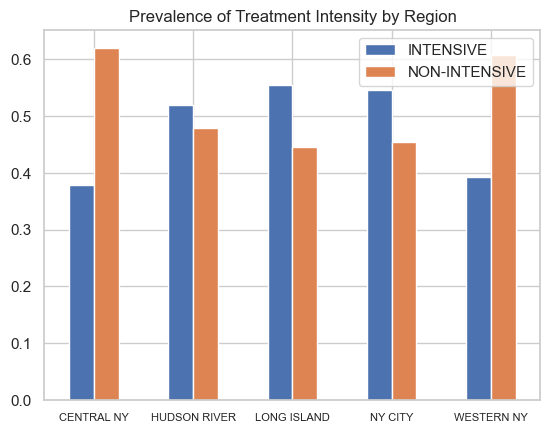

In [103]:
# region vs treatment intensity
pd.crosstab(CA2_treatment_intensity['region'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Region')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0, fontsize=8) 

In [105]:
# Clinical diagnoses & disorders

In [107]:
clinical_cols = ['mental_illness', 'serious_mental_illness', 'alcohol_disorder', 'substance_disorder', 'opioid_disorder']
for col in clinical_cols:
    print(f"\n{col}:")
    print(pd.crosstab(CA2_treatment_intensity[col], CA2_treatment_intensity['treatment_intensity']))

for col in clinical_cols:
    print(f"\n{col}:")
    print(pd.crosstab(CA2_treatment_intensity[col], CA2_treatment_intensity['treatment_intensity'], normalize='index'))


mental_illness:
treatment_intensity  INTENSIVE  NON-INTENSIVE
mental_illness                               
NO                         411           1017
YES                      29589          28983

serious_mental_illness:
treatment_intensity     INTENSIVE  NON-INTENSIVE
serious_mental_illness                          
NO                            714           2599
YES                         29286          27401

alcohol_disorder:
treatment_intensity  INTENSIVE  NON-INTENSIVE
alcohol_disorder                             
NO                       24226          27577
YES                       5774           2423

substance_disorder:
treatment_intensity  INTENSIVE  NON-INTENSIVE
substance_disorder                           
NO                       22189          26422
YES                       7811           3578

opioid_disorder:
treatment_intensity  INTENSIVE  NON-INTENSIVE
opioid_disorder                              
NO                       27892          28942
YES           

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

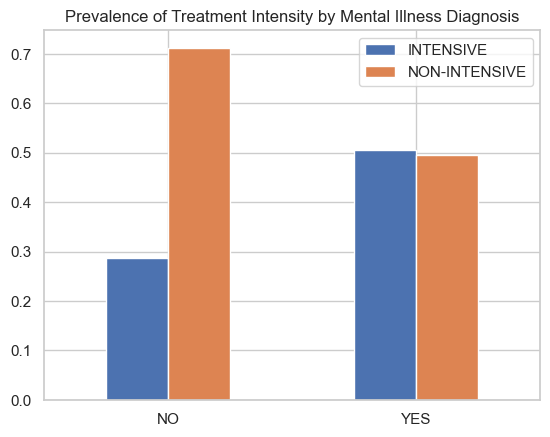

In [109]:
# mental illness diagnosis vs treatment intensity
pd.crosstab(CA2_treatment_intensity['mental_illness'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Mental Illness Diagnosis')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

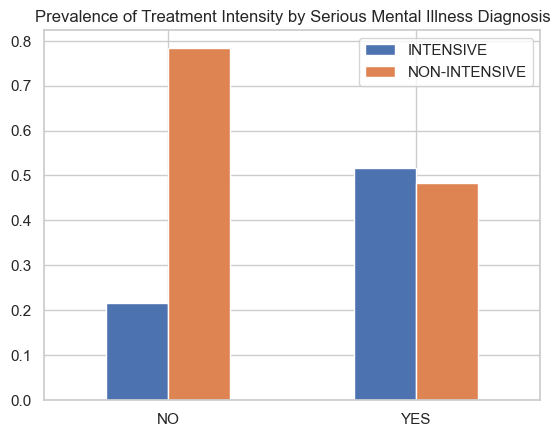

In [111]:
# serious mental illness diagnosis vs treatment intensity
pd.crosstab(CA2_treatment_intensity['serious_mental_illness'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Serious Mental Illness Diagnosis')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

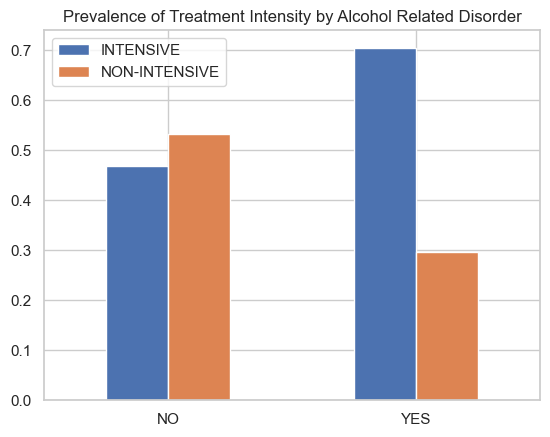

In [113]:
# alcohol disorder vs treatment intensity
pd.crosstab(CA2_treatment_intensity['alcohol_disorder'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Alcohol Related Disorder')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

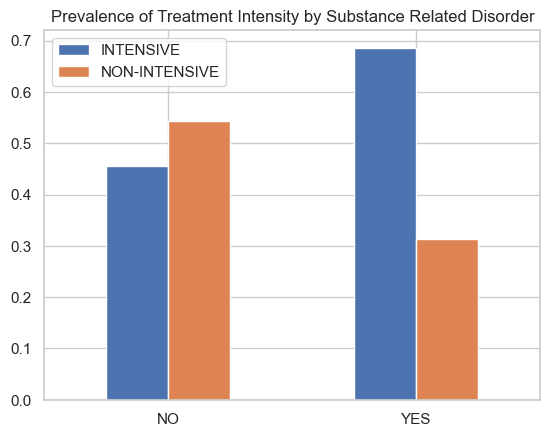

In [115]:
# drug substance disorder vs treatment intensity
pd.crosstab(CA2_treatment_intensity['substance_disorder'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Substance Related Disorder')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

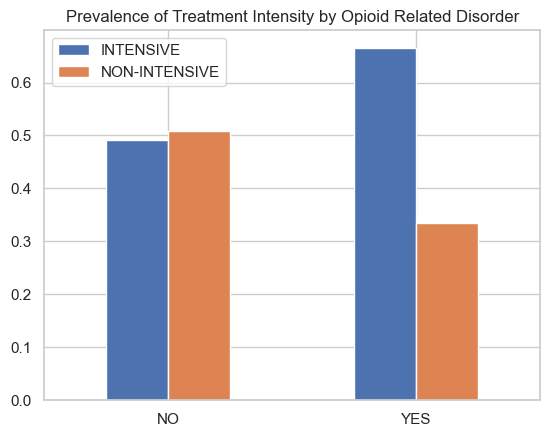

In [119]:
# opioid disorder vs treatment intensity
pd.crosstab(CA2_treatment_intensity['opioid_disorder'], CA2_treatment_intensity['treatment_intensity'], normalize='index').plot(kind='bar')
plt.title('Prevalence of Treatment Intensity by Opioid Related Disorder')
plt.legend(title='')
plt.xlabel('')
plt.xticks(rotation=0)

In [121]:
# DATA TRANSFORMATION

In [123]:
# Encoding values from Categorical to Numerical

In [125]:
# printing the values for all columns
for col in CA2_treatment_intensity.columns:
    print(f"\n{col}:")
    print(CA2_treatment_intensity[col].value_counts())


age_group:
age_group
ADULT    50358
CHILD     9642
Name: count, dtype: int64

gender:
gender
MALE      31751
FEMALE    28249
Name: count, dtype: int64

race:
race
WHITE ONLY            30658
BLACK ONLY            18347
OTHER/MULTI-RACIAL    10995
Name: count, dtype: int64

education_level:
education_level
HIGH SCHOOL     36396
COLLEGE+         9238
SOME COLLEGE     8870
ELEMENTARY       3919
OTHER            1577
Name: count, dtype: int64

employment_status:
employment_status
NOT IN LABOR FORCE    42473
EMPLOYED               9802
UNEMPLOYED             7093
VOLUNTEER               632
Name: count, dtype: int64

housing_situation:
housing_situation
PRIVATE HOME     45132
OTHER            13963
INSTITUTIONAL      905
Name: count, dtype: int64

region:
region
NY CITY         29637
WESTERN NY       9858
HUDSON RIVER     8655
CENTRAL NY       6377
LONG ISLAND      5473
Name: count, dtype: int64

no_insurance:
no_insurance
NO     56386
YES     3614
Name: count, dtype: int64

mental_illness

In [127]:
# Mapping Binary Columns: YES/NO to 1/0
map_bin_cols = [
    'no_insurance', 'mental_illness', 'serious_mental_illness',
    'alcohol_disorder', 'substance_disorder', 'opioid_disorder'
]

for col in map_bin_cols:
    CA2_treatment_intensity[col] = CA2_treatment_intensity[col].map({'YES': 1, 'NO': 0})

In [129]:
# Mapping Categorical Columns

In [131]:
# Age Group
map_age = {
    'ADULT': 1,
    'CHILD': 0
}

CA2_treatment_intensity['age_group'] = CA2_treatment_intensity['age_group'].map(map_age)

In [133]:
# Gendre
map_gender = {
    'MALE': 1,
    'FEMALE': 0
}

CA2_treatment_intensity['gender'] = CA2_treatment_intensity['gender'].map(map_gender)

In [135]:
# Race
map_race = {
    'WHITE ONLY': 1,
    'BLACK ONLY': 2,
    'OTHER/MULTI-RACIAL': 0
}

CA2_treatment_intensity['race'] = CA2_treatment_intensity['race'].map(map_race)

In [137]:
# Education
map_education = {
    'ELEMENTARY': 0,
    'HIGH SCHOOL': 1,
    'SOME COLLEGE': 2,  
    'COLLEGE+': 3,
    'OTHER': 4,
}

CA2_treatment_intensity['education_level'] = CA2_treatment_intensity['education_level'].map(map_education)

In [139]:
# Employment
map_employment = {
    'NOT IN LABOR FORCE': 0,
    'EMPLOYED': 1,
    'UNEMPLOYED': 2,
    'VOLUNTEER': 3,
}

CA2_treatment_intensity['employment_status'] = CA2_treatment_intensity['employment_status'].map(map_employment)

In [141]:
# Housing
map_housing = {
    'OTHER': 0,
    'PRIVATE HOME': 1,
    'INSTITUTIONAL': 2
}

CA2_treatment_intensity['housing_situation'] = CA2_treatment_intensity['housing_situation'].map(map_housing)

In [143]:
# Region
map_region = {
    'NY CITY': 0,
    'WESTERN NY': 1,
    'HUDSON RIVER': 2,
    'CENTRAL NY': 3,
    'LONG ISLAND': 4,
}

CA2_treatment_intensity['region'] = CA2_treatment_intensity['region'].map(map_region)

In [145]:
# Treatment Intensity Level
map_treatment = {
    'INTENSIVE': 1,
    'NON-INTENSIVE': 0
}

CA2_treatment_intensity['treatment_intensity'] = CA2_treatment_intensity['treatment_intensity'].map(map_treatment)

In [147]:
# printing the values for all columns after encoding
for col in CA2_treatment_intensity.columns:
    print(f"\n{col}:")
    print(CA2_treatment_intensity[col].value_counts())


age_group:
age_group
1    50358
0     9642
Name: count, dtype: int64

gender:
gender
1    31751
0    28249
Name: count, dtype: int64

race:
race
1    30658
2    18347
0    10995
Name: count, dtype: int64

education_level:
education_level
1    36396
3     9238
2     8870
0     3919
4     1577
Name: count, dtype: int64

employment_status:
employment_status
0    42473
1     9802
2     7093
3      632
Name: count, dtype: int64

housing_situation:
housing_situation
1    45132
0    13963
2      905
Name: count, dtype: int64

region:
region
0    29637
1     9858
2     8655
3     6377
4     5473
Name: count, dtype: int64

no_insurance:
no_insurance
0    56386
1     3614
Name: count, dtype: int64

mental_illness:
mental_illness
1    58572
0     1428
Name: count, dtype: int64

serious_mental_illness:
serious_mental_illness
1    56687
0     3313
Name: count, dtype: int64

alcohol_disorder:
alcohol_disorder
0    51803
1     8197
Name: count, dtype: int64

substance_disorder:
substance_disorder
0 

In [149]:
# exporting the clean numerical dataset to a CSV file
#CA2_treatment_intensity.to_csv('C:/Users/maxwe/Desktop/MACHINE LEARNING SEP24/CA2/Datasets/CA2_treatment_intensity_encoded.csv', index=False)

In [151]:
# Visualisations: Features correlation

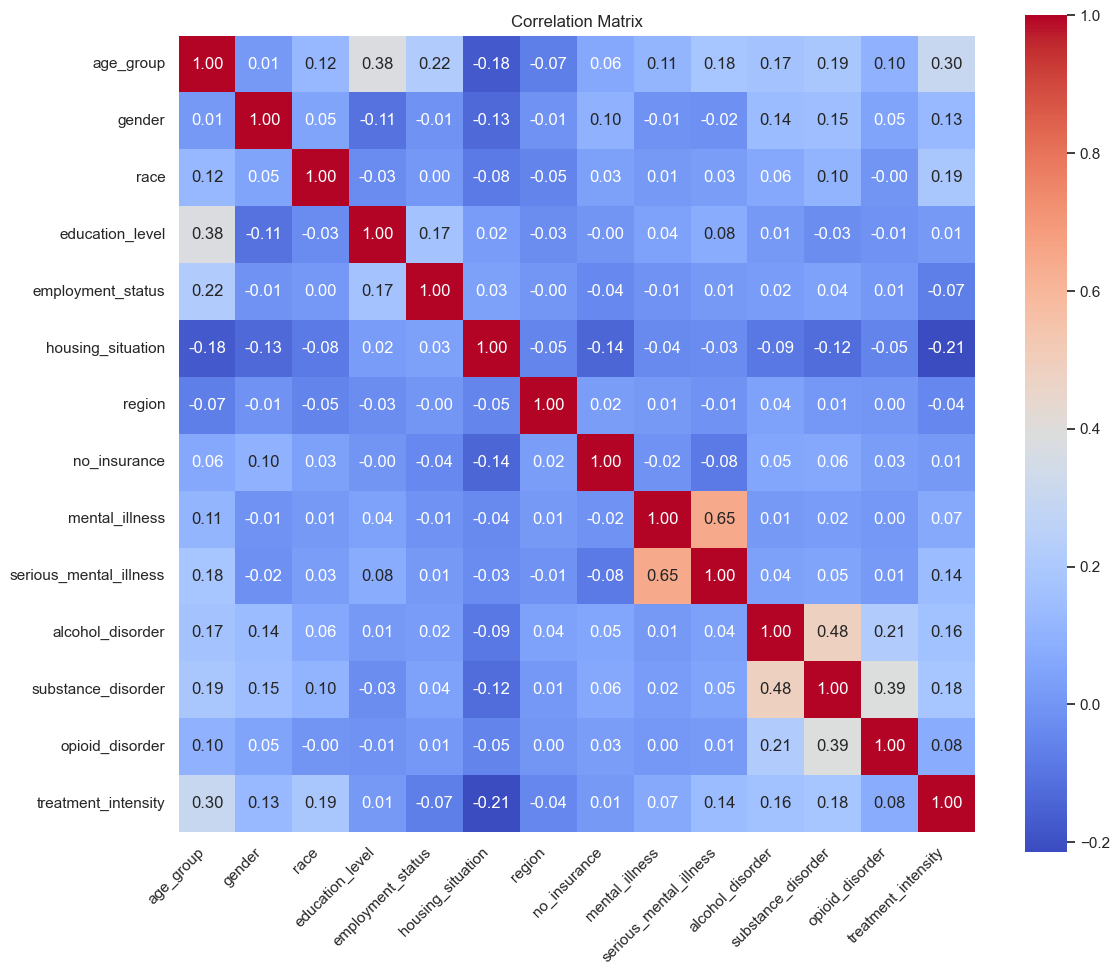

In [153]:
## running the Pearson correlation coefficient to create correlation matrix
correlation_matrix = CA2_treatment_intensity.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title('Correlation Matrix')
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [155]:
# based on the correlation matrix I will use the folloing 7 features:
# age_group (0.30), housing_situation (-0.21 OK), race (0.19), substance_disorder (0.18), 
# alcohol_disorder (0.16), serious_mental_illness (0.14), gender (0.13)

In [157]:
## MODELING

In [159]:
# creating features dataframe (7 features)
features = ['age_group', 'race', 'gender', 'housing_situation', 'serious_mental_illness', 'substance_disorder', 'alcohol_disorder']

# features 
X = CA2_treatment_intensity[features]
y = CA2_treatment_intensity['treatment_intensity']  

from sklearn.model_selection import train_test_split

# splitting Train/Test variables with stratification=yes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [161]:
## LOGISTIC REGRESSION ##

In [163]:
# Importing model
from sklearn.linear_model import LogisticRegression

# Initializing the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Training the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [165]:
# Making predictions
# Predicting class labels & predicting probabilities for the positive class: treatment_intensity = 1 (INTENSIVE)
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [167]:
## LOGISTIC REGRESSION - Evaluation Performance 

In [169]:
# Importing performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Performance Metrics
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")

# Saving performance metrics
lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1score = f1_score(y_test, y_pred)
lr_rocauc = roc_auc_score(y_test, y_proba)

Logistic Regression Results:
Accuracy: 0.67
Precision: 0.65
Recall: 0.74
F1-Score: 0.69
ROC-AUC: 0.73


In [171]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      6000
           1       0.65      0.74      0.69      6000

    accuracy                           0.67     12000
   macro avg       0.68      0.67      0.67     12000
weighted avg       0.68      0.67      0.67     12000



In [173]:
# Confusion Matrix: Actual vs Predicted
crosstab_logreg = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) 
print("Crosstab (Confusion Matrix):\n")
print(crosstab_logreg)

Crosstab (Confusion Matrix):

Predicted     0     1
Actual               
0          3645  2355
1          1562  4438


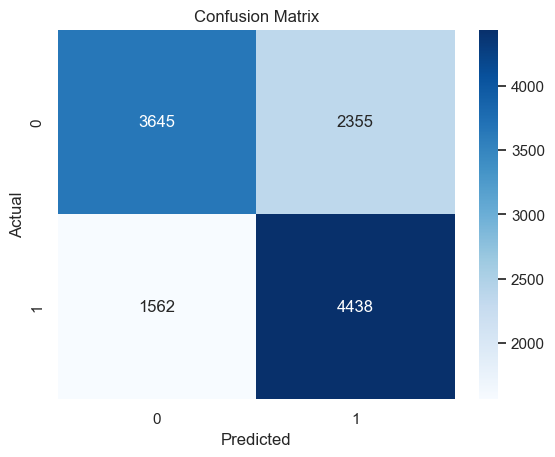

In [175]:
# Confusion Matrix: Actual vs Predicted
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

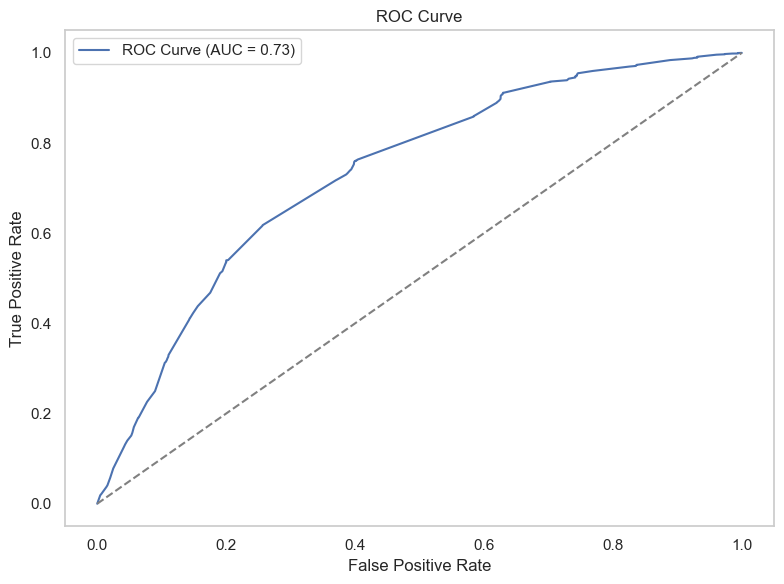

In [177]:
# Ploting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {lr_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
## NAIVE BAYES ##

In [179]:
# Importing model
from sklearn.naive_bayes import GaussianNB

# Initializing the model
nb = GaussianNB()

# Training the model
nb.fit(X_train, y_train)

GaussianNB()

In [181]:
# Making predictions
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [ ]:
## NAIVE BAYES - Evaluation Performance

In [183]:
# Performance Metrics
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_nb):.2f}")

# Saving performance metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1score = f1_score(y_test, y_pred_nb)
nb_rocauc = roc_auc_score(y_test, y_proba_nb)

Naive Bayes Results:
Accuracy: 0.69
Precision: 0.66
Recall: 0.77
F1-Score: 0.71
ROC-AUC: 0.73


In [185]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.60      0.66      6000
           1       0.66      0.77      0.71      6000

    accuracy                           0.69     12000
   macro avg       0.69      0.69      0.69     12000
weighted avg       0.69      0.69      0.69     12000



In [189]:
# Confusion Matrix (Crosstab)
crosstab_nb = pd.crosstab(y_test, y_pred_nb, rownames=['Actual'], colnames=['Predicted'])
print("Crosstab (Confusion Matrix):\n")
print(crosstab_nb)

Crosstab (Confusion Matrix):

Predicted     0     1
Actual               
0          3621  2379
1          1368  4632


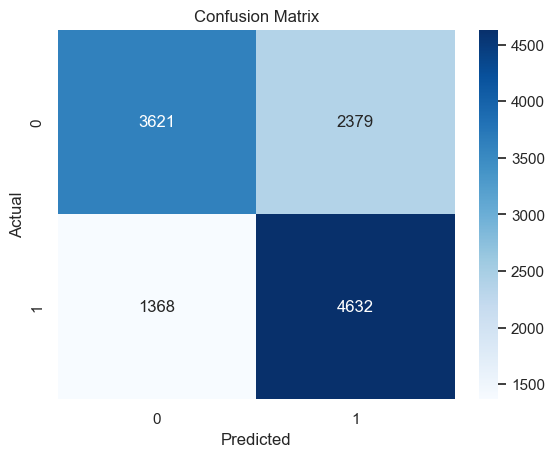

In [191]:
# Confusion Matrix Heatmap
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

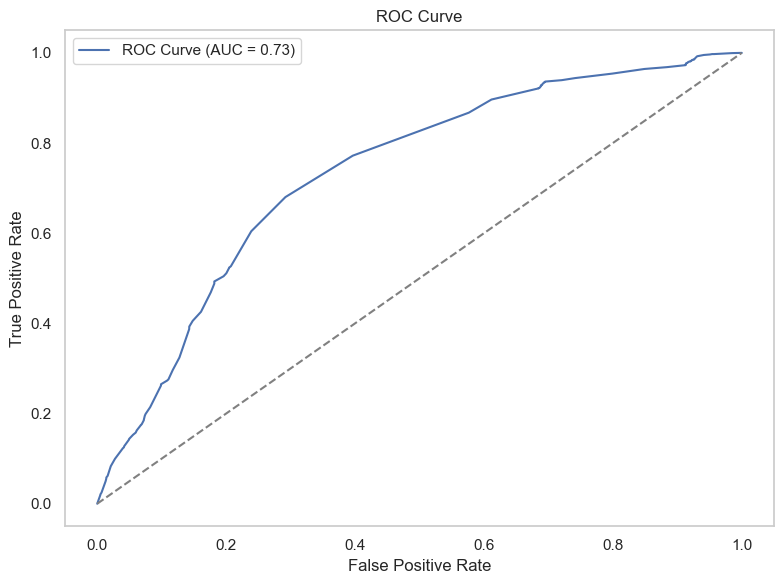

In [193]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {nb_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [195]:
## DECISION TREE ##

In [197]:
# Importing model
from sklearn.tree import DecisionTreeClassifier

# Initializing the model
dtree = DecisionTreeClassifier(random_state=42)

# Training the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [199]:
# Making predictions
y_pred_dt = dtree.predict(X_test)
y_proba_dt = dtree.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [201]:
## DECISION TREE - Evaluation Performance 

In [203]:
# Performance Metrics
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_dt):.2f}")

# Saving performance metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1score = f1_score(y_test, y_pred_dt)
dt_rocauc = roc_auc_score(y_test, y_proba_dt)

Decision Tree Results:
Accuracy: 0.70
Precision: 0.71
Recall: 0.68
F1-Score: 0.70
ROC-AUC: 0.76


In [205]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71      6000
           1       0.71      0.68      0.70      6000

    accuracy                           0.70     12000
   macro avg       0.70      0.70      0.70     12000
weighted avg       0.70      0.70      0.70     12000



In [207]:
# Confusion Matrix: Actual vs Predicted
crosstab_dtree = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])
print("Crosstab (Confusion Matrix):\n")
print(crosstab_dtree)

Crosstab (Confusion Matrix):

Predicted     0     1
Actual               
0          4331  1669
1          1904  4096


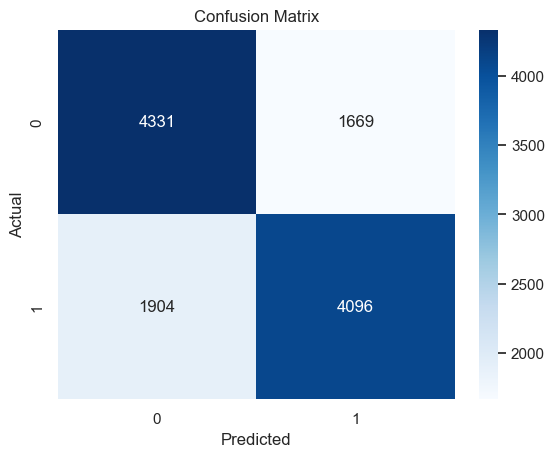

In [209]:
# Confusion Matrix: Actual vs Predicted
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

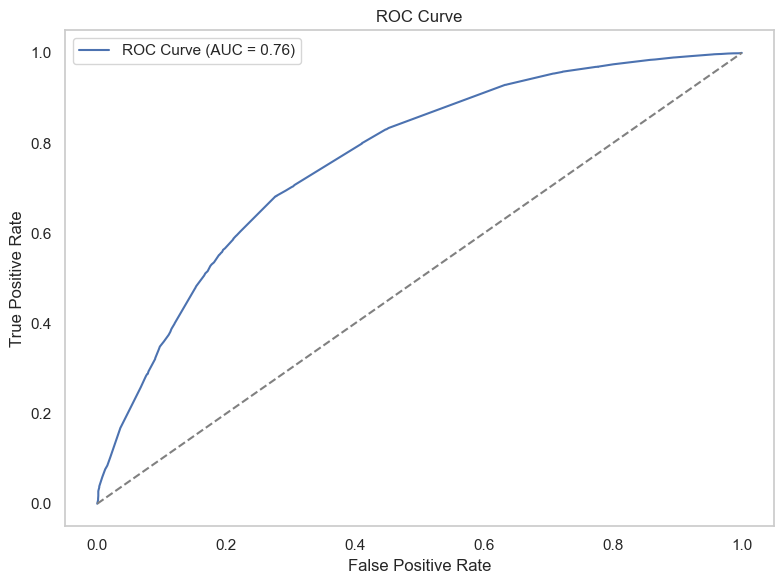

In [211]:
# Ploting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {dt_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [213]:
# Feature Importance

In [219]:
# Getting feature importances from Decision Tree model
dt_feature_importances = dtree.feature_importances_

# Creating a dataFrame of important features
dt_feature_importance_df = pd.DataFrame({'Feature': X_train.columns,'Importance': dt_feature_importances}).sort_values(by='Importance', ascending=False)

print(dt_feature_importance_df)

                  Feature  Importance
0               age_group    0.400536
3       housing_situation    0.248498
1                    race    0.154337
2                  gender    0.073621
4  serious_mental_illness    0.050331
5      substance_disorder    0.040566
6        alcohol_disorder    0.032112


C:\Users\maxwe\AppData\Local\Temp\ipykernel_21736\1705067487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df.head(7), palette='mako')


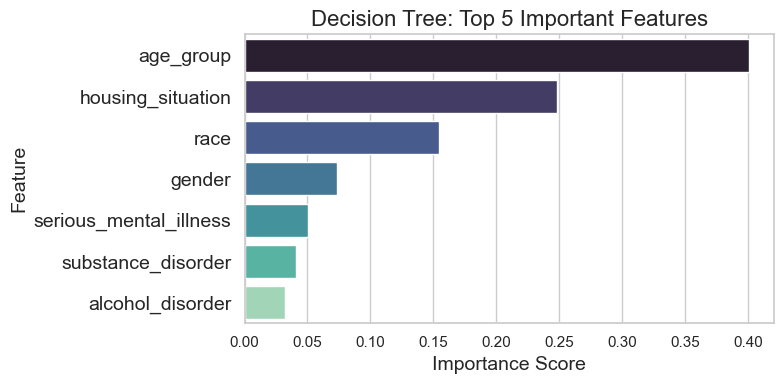

In [221]:
# Plotting 
plt.figure(figsize=(8, 4))

sns.barplot(x='Importance', y='Feature', data=dt_feature_importance_df.head(7), palette='mako')
plt.title('Decision Tree: Top 5 Important Features', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
## K-Nearest Neighbors ##

In [283]:
# Importing model
from sklearn.neighbors import KNeighborsClassifier

# Initializing the model
knn = KNeighborsClassifier(n_neighbors=10)

# Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [285]:
# Making predictions
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [286]:
## KNN - Evaluation Performance

In [287]:
print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_knn):.2f}")

# Saving performance metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1score = f1_score(y_test, y_pred_knn)
knn_rocauc = roc_auc_score(y_test, y_proba_knn)

KNN Results:
Accuracy: 0.64
Precision: 0.63
Recall: 0.65
F1-Score: 0.64
ROC-AUC: 0.70


In [291]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63      6000
           1       0.63      0.65      0.64      6000

    accuracy                           0.64     12000
   macro avg       0.64      0.64      0.64     12000
weighted avg       0.64      0.64      0.64     12000



In [293]:
# Confusion Matrix (Crosstab)
crosstab_knn = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
print("Crosstab (Confusion Matrix):\n")
print(crosstab_knn)

Crosstab (Confusion Matrix):

Predicted     0     1
Actual               
0          3738  2262
1          2085  3915


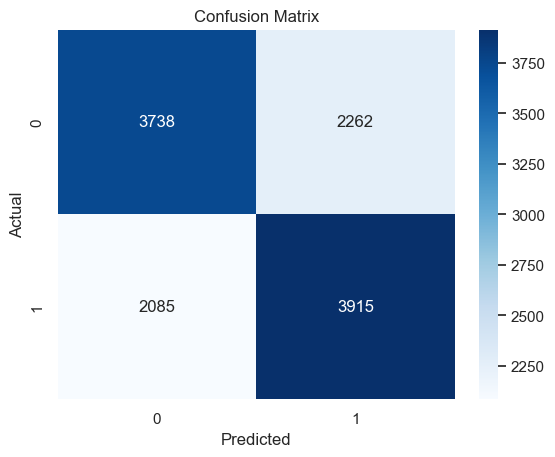

In [295]:
# Confusion Matrix Heatmap
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

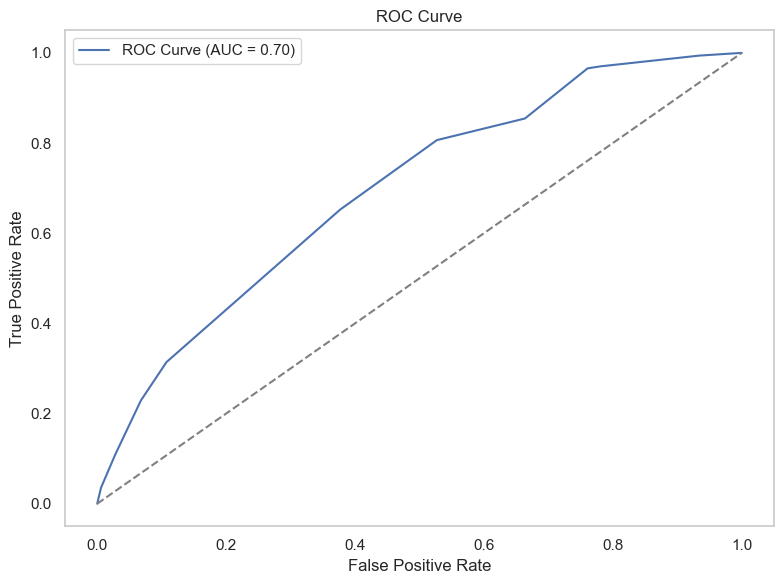

In [301]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {knn_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
## RANDOM FOREST ##

In [321]:
# importing model
from sklearn.ensemble import RandomForestClassifier

# Initializing the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, max_features='sqrt', random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [323]:
# Making predictions
# Predicting class labels & predicting probabilities for the positive class: treatment_intensity = 1 (INTENSIVE)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [325]:
## RANDOM FOREST - Evaluation Performance 

In [327]:
# Performance Metrics
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_rf):.2f}")

# Saving performance metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1score = f1_score(y_test, y_pred_rf)
rf_rocauc = roc_auc_score(y_test, y_proba_rf)

Random Forest Results:
Accuracy: 0.70
Precision: 0.71
Recall: 0.68
F1-Score: 0.70
ROC-AUC: 0.76


In [329]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.72      0.71      6000
           1       0.71      0.68      0.70      6000

    accuracy                           0.70     12000
   macro avg       0.70      0.70      0.70     12000
weighted avg       0.70      0.70      0.70     12000



In [331]:
# Confusion Matrix: Actual vs Predicted
crosstab_rf = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
print("Crosstab (Confusion Matrix):\n")
print(crosstab_rf)

Crosstab (Confusion Matrix):

Predicted     0     1
Actual               
0          4333  1667
1          1903  4097


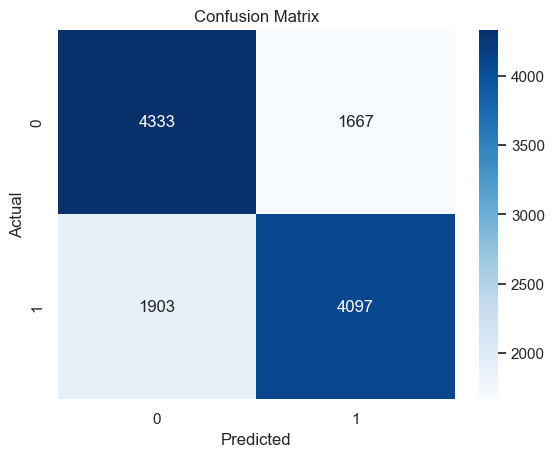

In [333]:
# Confusion Matrix: Actual vs Predicted
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

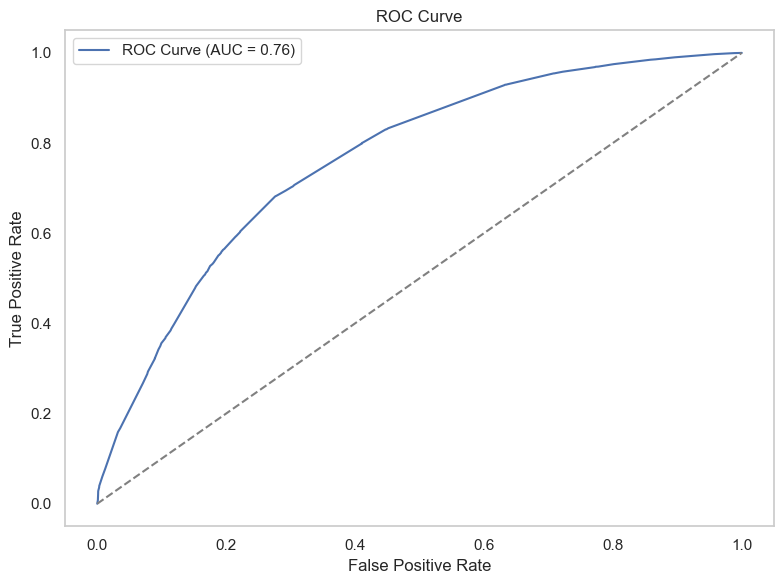

In [335]:
# Ploting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {rf_rocauc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [339]:
# Getting feature importances from Decision Tree model
rf_feature_importances = rf_model.feature_importances_

# Creating a dataFrame of important features
rf_feature_importance_df = pd.DataFrame({'Feature': X_train.columns,'Importance': rf_feature_importances}).sort_values(by='Importance', ascending=False)

print(rf_feature_importance_df)

                  Feature  Importance
0               age_group    0.313009
3       housing_situation    0.299695
1                    race    0.148538
5      substance_disorder    0.068972
2                  gender    0.063871
4  serious_mental_illness    0.056727
6        alcohol_disorder    0.049187


C:\Users\maxwe\AppData\Local\Temp\ipykernel_21736\3835602462.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df.head(7), palette='rocket')


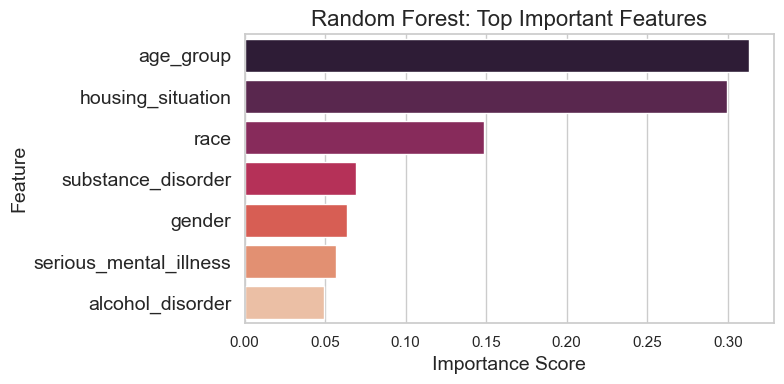

In [343]:
# Plotting 
plt.figure(figsize=(8, 4))

sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df.head(7), palette='rocket')
plt.title('Random Forest: Top Important Features', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
## MODEL COMPARISON ##

In [347]:
# Collecting all metrics in a list of dictionaries
all_model_metrics = [
    {'Model': 'Logistic Regression', 'Accuracy': lr_accuracy, 'Precision': lr_precision, 'Recall': lr_recall, 'F1-Score': lr_f1score, 'ROC-AUC': lr_rocauc},
    {'Model': 'Naive Bayes', 'Accuracy': nb_accuracy, 'Precision': nb_precision, 'Recall': nb_recall, 'F1-Score': nb_f1score, 'ROC-AUC': nb_rocauc},
    {'Model': 'Decision Tree', 'Accuracy': dt_accuracy, 'Precision': dt_precision, 'Recall': dt_recall, 'F1-Score': dt_f1score, 'ROC-AUC': dt_rocauc},
    {'Model': 'K-Nearest Neighbor',   'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1-Score': knn_f1score, 'ROC-AUC': knn_rocauc},
    {'Model': 'Random Forest', 'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1-Score': rf_f1score, 'ROC-AUC': rf_rocauc},
]

# Converting to a dataframe
all_metrics = pd.DataFrame(all_model_metrics)

# Melting dataframe to a format for seaborn
all_metrics_melted = all_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

In [375]:
# Converting to DataFrame
metrics_df = pd.DataFrame(all_model_metrics)

# Rounding all metrics to 2 decimal
metrics_df = metrics_df.round(2)

# printing the table
print(metrics_df.to_string(index=False))

              Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression      0.67       0.65    0.74      0.69     0.73
        Naive Bayes      0.69       0.66    0.77      0.71     0.73
      Decision Tree      0.70       0.71    0.68      0.70     0.76
 K-Nearest Neighbor      0.64       0.63    0.65      0.64     0.70
      Random Forest      0.70       0.71    0.68      0.70     0.76


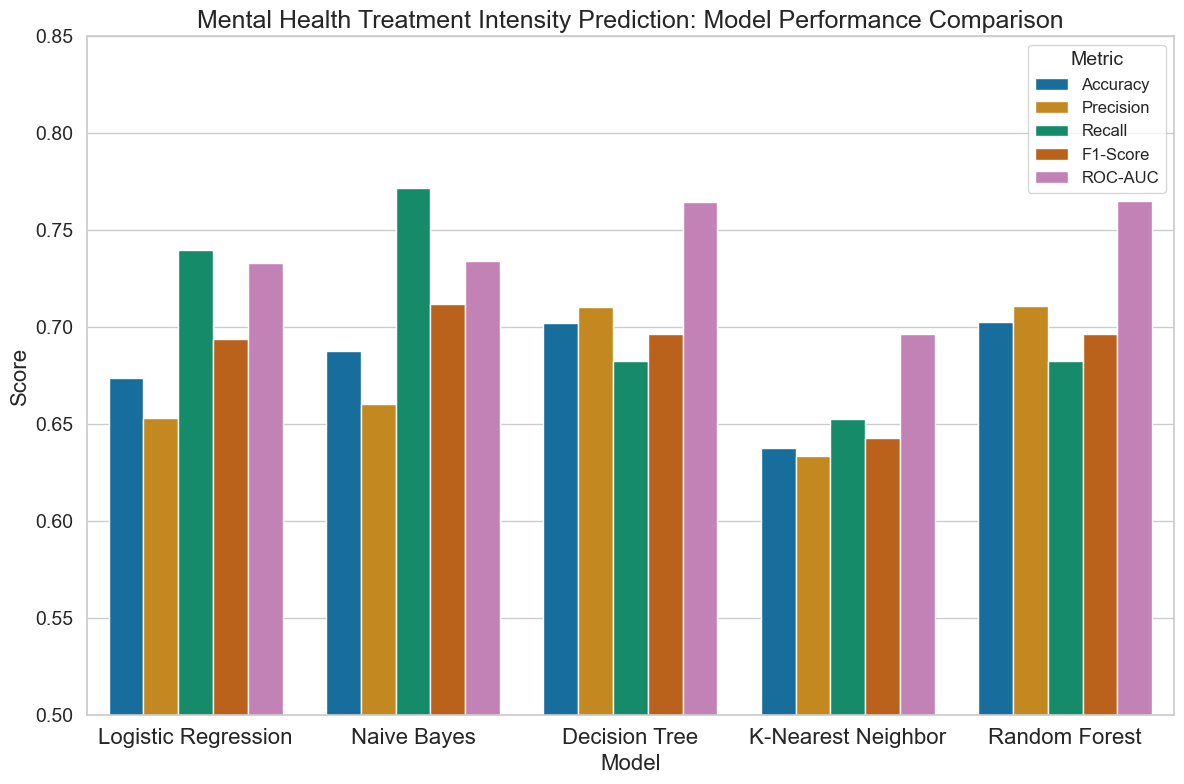

In [367]:
# plotting comparison chart
plt.figure(figsize=(12, 8))
sns.barplot(data=all_metrics_melted, x='Model', y='Score', hue='Metric', palette='colorblind')

plt.title('Mental Health Treatment Intensity Prediction: Model Performance Comparison', fontsize=18)
plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.ylim(0.5, 0.85)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.legend(title='Metric', loc='upper right', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()